In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

 데이터 분석에 필요한 라이브러리를 불러옵니다.

In [11]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


주어진 train데이터와 test데이터를 csv형태로 읽고, train데이터의 상위5개의 항목을 확인합니다.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


대략 적인 train의 정보를 확인합니다.

non-null데이터의 수가 다른 것을 보아 주어진 데이터중 결측치가 있는 것 같습니다.

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

train데이터 중 비어있는 부분이 얼마나 되는지 확인합니다.

'Age'의 경우 177개, 'Cabin'의 경우 687개, 'Embarked'의 경우 2개의 항목이 비어있는 값 입니다.

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


이번에는 test데이터의 정보를 확인해봅니다.

'Age'와 'Fare', 'Cabin'의 데이터가 부분부분 비어있습니다.

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

'Age'의 경우 86개, 'Cabin'의 경우 327개, 'Fare'의 경우 1개의 항목이 비어있는 값 입니다.

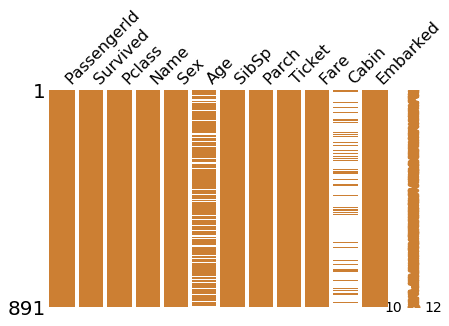

In [16]:
msno.matrix(df=train.iloc[:, :], figsize=(6, 4), color=(0.8, 0.5, 0.2))

msno라이브러리를 사용하여 Train 결측치를 시각화 했습니다.

In [17]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked='True', figsize=(10,5))

이제 feature과 'Survived'사이에 그림을 그려 상관관계를 비교해보겠습니다.

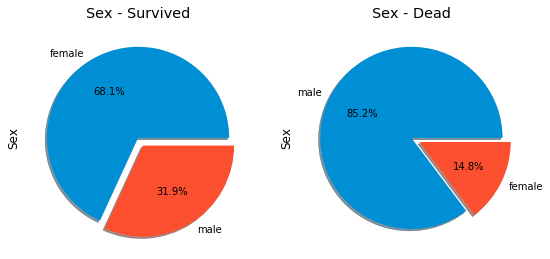

In [18]:
f, ax = plt.subplots(1, 2, figsize=(8, 5))

train[train['Survived']==1]['Sex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Sex - Survived')
train[train['Survived']==0]['Sex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[1].set_title('Sex - Dead')
plt.show()

여성의 경우 남성보다 생존률이 높고, 죽은 사람은 대부분 남자입니다.

성별은생존에 상당한 영향을 주는 feature로 생각됩니다.

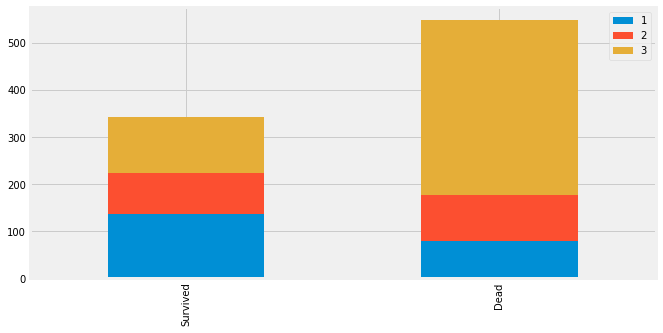

In [19]:
bar_chart('Pclass')

탑승 Class별 생존현황입니다.

생존자의 경우 1, 2, 3 class가 고르게 분포한 반면, 죽은 사람은 낮은 class일수록 더 많습니다.

생존과 상관 관계가 있는 feature로 판단됩니다.

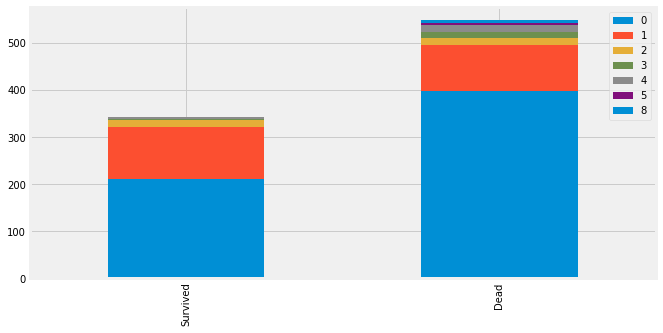

In [20]:
bar_chart("SibSp")

함께 탑승한 형제와 배우자의 수가 1명일경우 생존 확률이 더 높습니다.

0명 혹은 2명 이상일 경우는 죽은 수가 더 많네요.

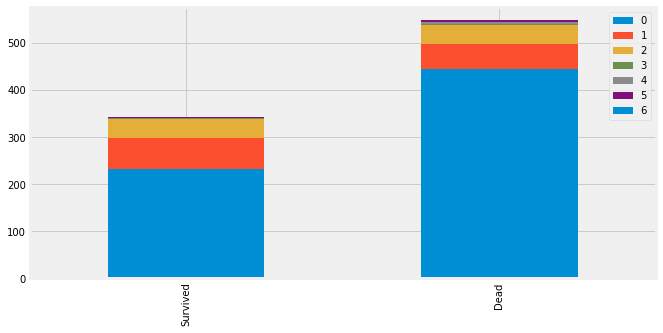

In [21]:
bar_chart("Parch")

혼자 탑승한 경우 죽은 사람이 더 많지만,

함께 탑승한 부모, 아이의 수가 1~2명인 경우 생존확률이 더 높은 것으로 보입니다.

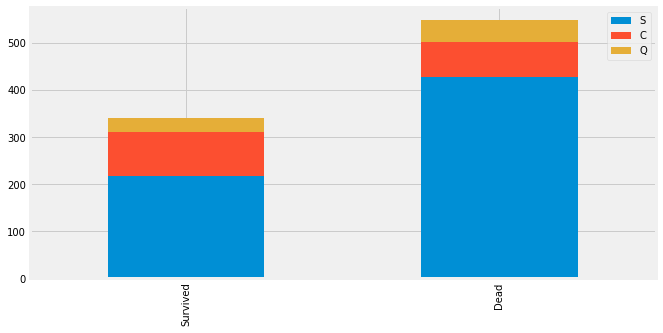

In [22]:
bar_chart("Embarked")

탑승 지역별 생존 현황입니다. 

Q,S지역의 경우 죽은 사람이 더 많고 C지역은 생존자가 더 많습니다.

No handles with labels found to put in legend.


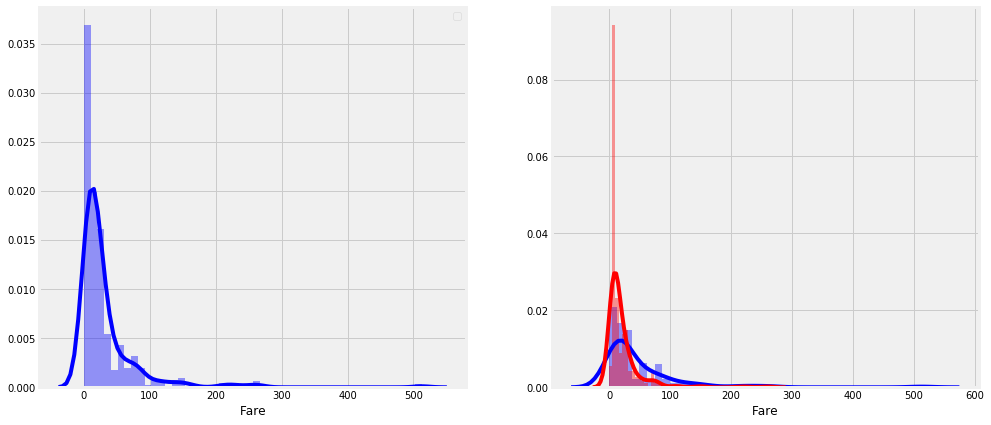

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plot = sns.distplot(train['Fare'], color='b', ax =ax[0])
plot2 = sns.distplot(train['Fare'][train["Survived"]==1], color='b',  ax =ax[1])
plot2 = sns.distplot(train['Fare'][train["Survived"]==0], color='r',  ax =ax[1])
plot= plot.legend(loc='best')

오른쪽 그래프는 'Fare'에 대한 히스토그램을 나타냈습니다. 0~100사이의 값이 대부분을 차지합니다.

오른쪽의 그래프는 빨간 선은 경우 Dead, 파란 선은 Survived를 나타냅니다. 

낮은 운임의 경우 죽은 사람이 더많고 높은 운임일수록 확실히 생존자가 더 많습니다.

In [24]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barkworth, Mr. Algernon Henry Wilson",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


describe함수를 이용해 전체적인 통계정보를 요약해서 확인합니다.

이상치를 판별하는데 유용할 것 같습니다.

In [25]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

'Cabin'의 경우 비어있는 데이터가 많고 초보자가 가공하기 어려워보입니다.

연습 단계이므로 'Cabin'과 별 의미를 담고있지 않은 것 같은 'Ticket'을 제거합니다.

In [26]:
southhampton= train[train["Embarked"]=='S'].shape[0]
print('S : ', southhampton)
cherbourg= train[train["Embarked"]=='C'].shape[0]
print('C : ',cherbourg)
queenstown = train[train["Embarked"]=='Q'].shape[0]
print('D : ',cherbourg)

S :  644
C :  168
D :  168


탑승 항구별 사람 수 입니다. 

southhampton가 가장 많습니다.

In [27]:
train=train.fillna({"Embarked" : "S"})

"Embarked"의 결측 데이터가 2개가 있었습니다.

최빈값인 southhampton로 채워넣겠습니다.

In [28]:
embarked_mapping = {'S': 1 , "C" : 2 , "Q" : 3}
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


머신러닝을 하기위해서 컴퓨터에게 정보를 알려줘야합니다.

문자의 경우 인식을 하지못하므로 문자데이터를 숫자로 변환하여 적용하겠습니다.

map함수를 통해 "Embarked" column의 데이터의 이름을 숫자로 변경합니다.

In [29]:
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


이부분이 약간 어렵습니다. 탑승객의 이름에는 Mr, Miss같은 정보가 담겨있습니다.

이 정보로 나이를 예측하는데 도움을 받을 것입니다.

정규화식을통해 어떤 단어가 많이 등장했는지 확인해봅니다.

In [30]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Other')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mile', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mlle,1.000000
3,Mr,0.156673
4,Mrs,0.793651
5,Other,0.285714
6,Royal,1.000000


각자 성별에 맞는 이름과 매치하고, 자주 등장하지 않는 단어는 Other로 통합하여 새로운 'Title' 컬럼을 만듭니다.

'Countess', 'Lady', 'Sir'의 경우 귀족에게 붙는 이름이라 Royal로 묶었는데 

Royal의 경우 모두 생존했습니다.

In [31]:
train.loc[(train.Age.isnull())&(train.Title=='Mr'),'Age'] = 33
train.loc[(train.Age.isnull())&(train.Title=='Mrs'),'Age'] = 36
train.loc[(train.Age.isnull())&(train.Title=='Master'),'Age'] = 5
train.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age'] = 22
train.loc[(train.Age.isnull())&(train.Title=='Other'),'Age'] = 46

test.loc[(test.Age.isnull())&(test.Title=='Mr'),'Age'] = 33
test.loc[(test.Age.isnull())&(test.Title=='Mrs'),'Age'] = 36
test.loc[(test.Age.isnull())&(test.Title=='Master'),'Age'] = 5
test.loc[(test.Age.isnull())&(test.Title=='Miss'),'Age'] = 22
test.loc[(test.Age.isnull())&(test.Title=='Other'),'Age'] = 46

이름을 토대로 나이를 예측하여 결측치를 채웠습니다.

대략 아이이름, 결혼 여부로 예측된 수치입니다.

In [32]:
title_mapping = {'Mr' : 1, 'Miss' : 2, "Mrs" : 3, "Master" : 4, "Royal" : 5, "Rare" : 6 }
for dataset in combine:
    dataset['Title']= dataset["Title"].map(title_mapping)
    dataset['Title']= dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1.0


컴퓨터가 인식하도록 문자를 숫자로 mapping합니다.

In [33]:
train = train.drop(['Name', 'PassengerId'] , axis = 1)
test = test.drop(['Name', 'PassengerId'] , axis = 1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1.0
1,1,1,female,38.0,1,0,71.2833,2,3.0
2,1,3,female,26.0,0,0,7.9250,1,2.0
3,1,1,female,35.0,1,0,53.1000,1,3.0
4,0,3,male,35.0,0,0,8.0500,1,1.0


Name정보는 사용해 Title로 가공했으니 제거해줍니다.

PassengerId는 생존여부와 별로 상관없어 보여 같이 제거합니다. 

In [34]:
sex_mapping = {"male" : 0 , "female" : 1}
for dataset in combine:
    dataset['Sex']= dataset['Sex'].map(sex_mapping)

성별을 숫자로 mapping합니다.

In [35]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1.0,Student
1,1,1,1,38.0,1,0,71.2833,2,3.0,Adult
2,1,3,1,26.0,0,0,7.9250,1,2.0,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3.0,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1.0,Young Adult


Age를 나이대별로 카테고리화 합니다.

너무 많은 분류기준은 오히려 성능을 안좋게 만들 수 있습니다.

In [36]:
age_mapping={'Baby' :1, 'Child':2, 'Teenager':3, 'Student':4, 'Young Adult':5, 'Adult':6, 'Senior':7}
train["AgeGroup"]= train["AgeGroup"].map(age_mapping)
test["AgeGroup"]= test["AgeGroup"].map(age_mapping)
train = train.drop(['Age'] , axis =1)
test = test.drop(['Age'], axis = 1)

카테고리화한 문자데이터를 숫자로 mapping합니다.

이것으로 새로운 AgeGroup 컬럼이 생겼으므로 Age는 제거합니다.

In [37]:
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean() 

train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

test의 비어있는 Fare데이터 하나를 평균 값으로 채워넣습니다.

Fare의 데이터는 0~800으로 다양합니다. 넓은 범위의 데이터는 머신러닝에 악영향을 줄 수 있으므로

로그스케일링을 해줍니다.

No handles with labels found to put in legend.


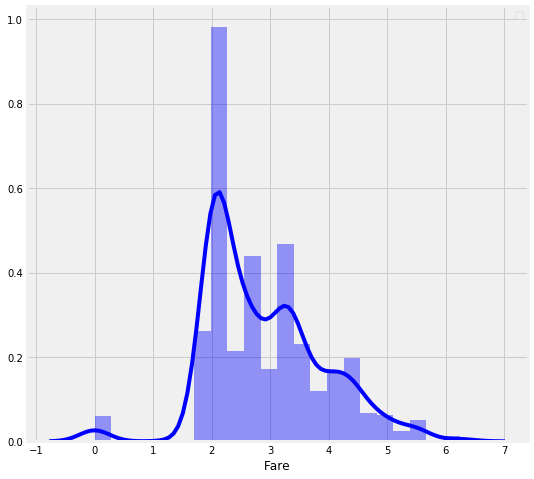

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
fare_plot = sns.distplot(train['Fare'], color='b', ax=ax)
fare_plot = fare_plot.legend(loc='best')

스케일링된 Fare의 히스토그램입니다.

In [39]:
train_data = train.drop(["Survived"], axis=1)
target = train["Survived"]

이제 학습데이터의 feature과 label을 분리합니다.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10 , shuffle =True, random_state = 0)

KFold의 교차검증을 이용해 어느 모델을 사용할지 판단합니다.

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
Title       891 non-null float64
AgeGroup    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [43]:
clf = RandomForestClassifier(n_estimators = 13)

In [44]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data , target, cv= k_fold, n_jobs=1, scoring= scoring)
print(score)

[0.81111111 0.83146067 0.7752809  0.78651685 0.83146067 0.83146067
 0.79775281 0.84269663 0.82022472 0.82022472]


In [45]:
round(np.mean(score)*100,2)

81.48

RandomForestClassifier 81.71%

In [46]:
clf = KNeighborsClassifier()

In [47]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data , target, cv= k_fold, n_jobs=1, scoring= scoring)
print(score)

[0.81111111 0.83146067 0.76404494 0.85393258 0.82022472 0.80898876
 0.83146067 0.80898876 0.78651685 0.83146067]


In [48]:
round(np.mean(score)*100,2)

81.48

KNeighborsClassifier 81.48%

In [49]:
clf =DecisionTreeClassifier()

In [50]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data , target, cv= k_fold, n_jobs=1, scoring= scoring)
print(score)

[0.75555556 0.82022472 0.80898876 0.78651685 0.80898876 0.80898876
 0.79775281 0.78651685 0.76404494 0.82022472]


In [51]:
round(np.mean(score)*100,2)

79.58

DecisionTreeClassifier() 79.69%

In [52]:
clf =GaussianNB()

In [53]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data , target, cv= k_fold, n_jobs=1, scoring= scoring)
print(score)

[0.82222222 0.80898876 0.78651685 0.78651685 0.78651685 0.7752809
 0.83146067 0.83146067 0.78651685 0.85393258]


In [54]:
round(np.mean(score)*100,2)

80.69

GaussianNB 80.69%

In [55]:
clf =SVC()

In [56]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data , target, cv= k_fold, n_jobs=1, scoring= scoring)
print(score)

[0.83333333 0.80898876 0.82022472 0.82022472 0.86516854 0.80898876
 0.82022472 0.85393258 0.82022472 0.86516854]


In [57]:
round(np.mean(score)*100,2)

83.16

SVC 83.16%

In [58]:
clf = SVC()
clf.fit(train_data, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
prediction = clf.predict(test)

In [61]:
test_Passenger = pd.read_csv('./data/test.csv')
submission = pd.DataFrame({"PassengerId":test_Passenger["PassengerId"], "Survived" : prediction})
submission.to_csv('submission.csv', index=False)

예측결과를 데이터 csv파일로 저장합니다.

In [62]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


저장내역을 확인할 수 있습니다.